In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
import matplotlib
import copy
import scipy.optimize as opt
import pickle
from astropy.nddata.utils import Cutout2D
%matplotlib notebook

import kg

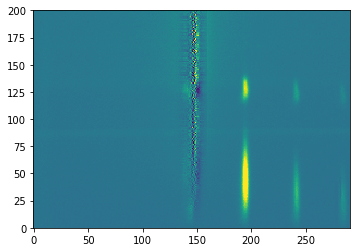

(2227, 291)


In [2]:
hdu = fits.open('std_sub.fits')
data = hdu[0].data
header = hdu[0].header

plt.imshow(data, vmin=-300, vmax=500)
#plt.xlim(0,250)
plt.ylim(0, 200)
plt.show()

print(np.shape(data))

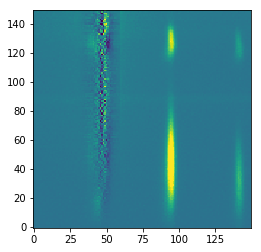

In [3]:
plt.imshow(data[0:150, 100:250], vmin=-300, vmax=500, origin='lower')

# Fight the bright trace orders

Brightest

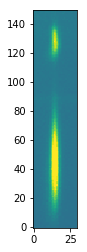

In [4]:
xc0 = 180
data_o0 = data[0:150, xc0:xc0+30]
plt.imshow(data_o0, vmin=-300, vmax=500, origin='lower')
xc1 = 225
data_o1 = data[0:150, xc1:xc1+30]
#plt.imshow(data_o1, vmin=-300, vmax=500), origin='lower'

In [5]:
x = np.arange(np.shape(data_o0)[1])
y = np.arange(np.shape(data_o0)[0])

x,y = np.meshgrid(x, y)

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  


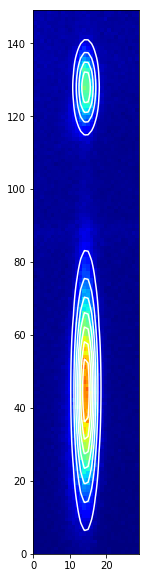

In [6]:
ig0 = [800, 10, 45, 5, 25, 0, 500, 10, 120, 5, 10, 0, 20]
popt0, pcov0 = opt.curve_fit(kg.tdmc_gau, (x,y), data_o0.flatten(), p0=ig0)

data_fitted0 = kg.tdmc_gau((x, y), *popt0)
fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(data_o0, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
ax.contour(x, y, data_fitted0.reshape(np.shape(data_o0)), 8, colors='w')
plt.show()

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  


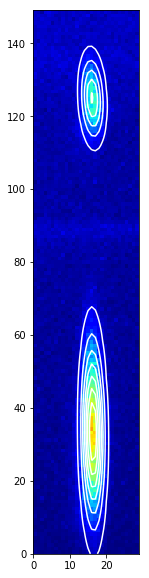

In [7]:
ig1 = [250, 10, 30, 5, 25, 0, 150, 10, 120, 5, 10, 0, 20]
popt1, pcov1 = opt.curve_fit(kg.tdmc_gau, (x,y), data_o1.flatten(), p0=ig1)

data_fitted1 = kg.tdmc_gau((x, y), *popt1)
fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(data_o1, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
ax.contour(x, y, data_fitted1.reshape(np.shape(data_o1)), 8, colors='w')
plt.show()

In [8]:
popt0_test = popt0
popt0_test[1] = popt0_test[1] + xc0
popt0_test[7] = popt0_test[7] + xc0

In [8]:
popt_ghost = popt1
 
xc_ghost = 140
popt_ghost[1] = xc_ghost+2
popt_ghost[2] = popt0[2]
popt_ghost[7] = xc_ghost
popt_ghost[0] = popt1[0] #amplitude of broad ghost image

In [9]:
print xc0, xc1

180 225


In [10]:
print popt_ghost[1]

142.0


In [11]:
print popt1

[ 2.30217747e+02  1.42000000e+02  4.47748662e+01  1.86220051e+00
  1.52594336e+01 -8.76184320e-03  1.41983527e+02  1.40000000e+02
  1.24833758e+02  1.96376449e+00  7.08376944e+00 -4.56406315e-02
  1.18688722e+01]


In [12]:
print popt_ghost

[ 2.30217747e+02  1.42000000e+02  4.47748662e+01  1.86220051e+00
  1.52594336e+01 -8.76184320e-03  1.41983527e+02  1.40000000e+02
  1.24833758e+02  1.96376449e+00  7.08376944e+00 -4.56406315e-02
  1.18688722e+01]


<IPython.core.display.Javascript object>


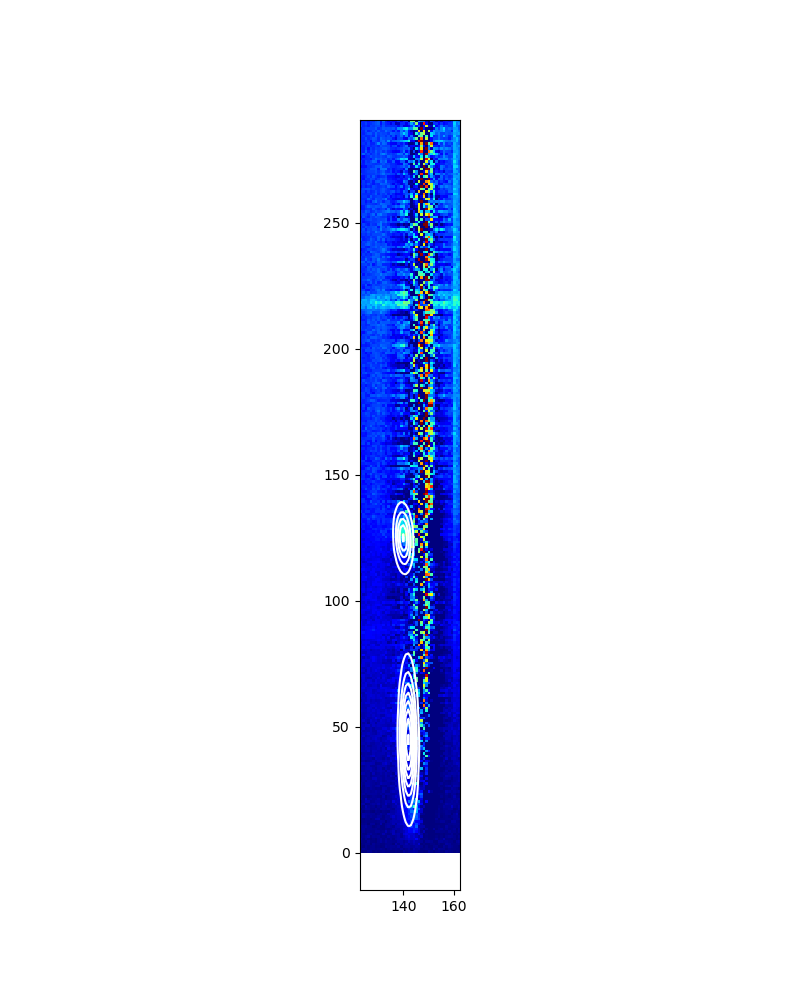

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
%matplotlib notebook

x = np.arange(np.shape(data)[1])
y = np.arange(np.shape(data)[0])

x,y = np.meshgrid(x, y)

#data_fitted = kg.tdmc_gau((x, y), *popt0_test)
ghost_fitted = kg.tdmc_gau((x, y), *popt_ghost)
fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(data, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
#ax.contour(x, y, data_fitted.reshape(np.shape(data)), 8, colors='w')
ax.contour(x, y, ghost_fitted.reshape(np.shape(data)), 8, colors='w')

plt.show()

In [15]:
print xc_ghost

140


<IPython.core.display.Javascript object>


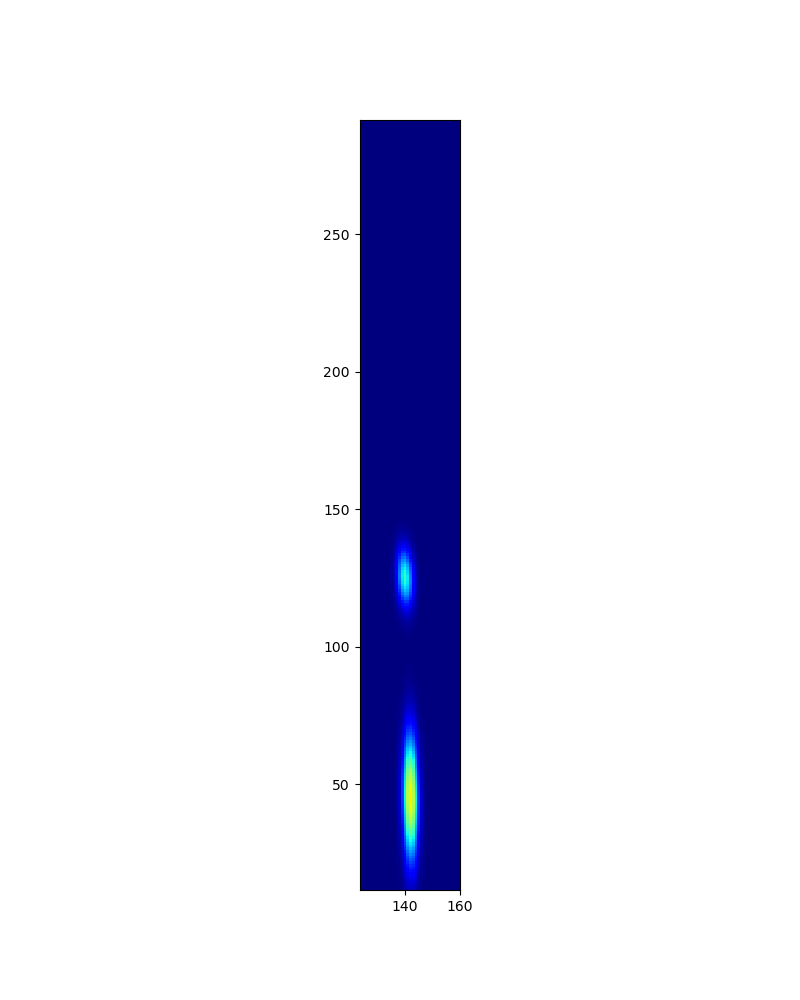

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  """


In [16]:
ghost_mask = np.zeros(np.shape(data))
ghost_mask[0:150, xc_ghost-15:xc_ghost+15] = ghost_fitted.reshape(np.shape(data))[0:150, xc_ghost-15:xc_ghost+15] - popt_ghost[-1]
ghost_mask = np.clip(ghost_mask, a_min=0, a_max=None)
fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(ghost_mask, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)

<IPython.core.display.Javascript object>


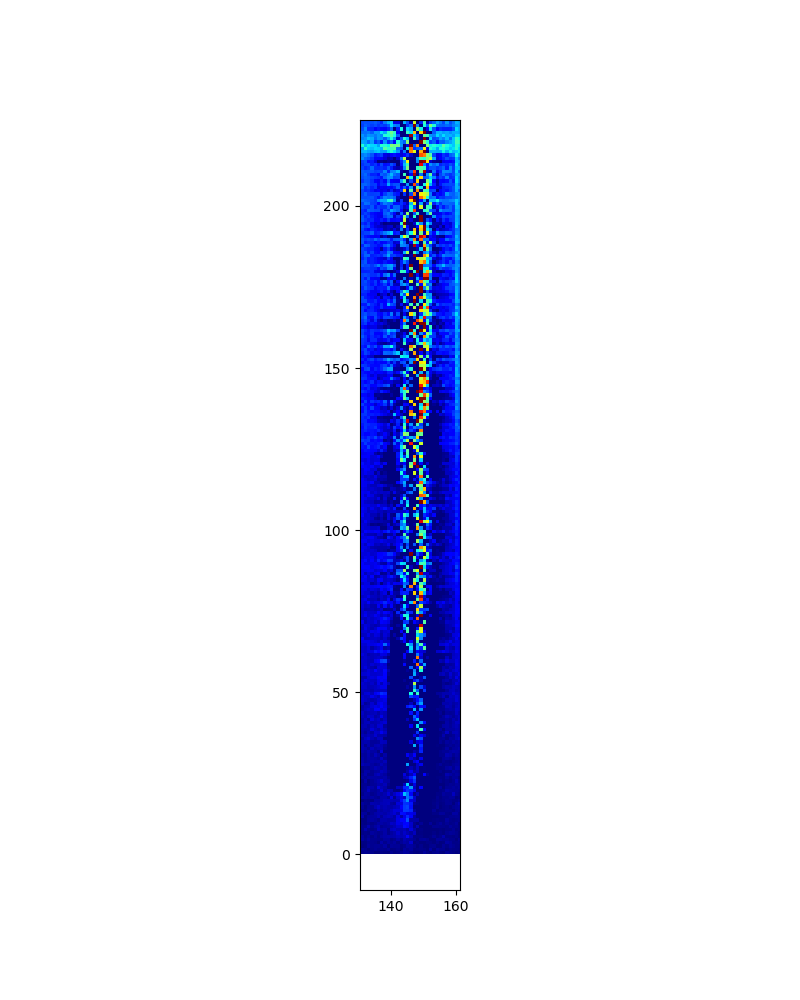

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  


In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(data-ghost_mask, cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)

In [17]:
np.shape(data_fitted.reshape(np.shape(data)))

NameError: name 'data_fitted' is not defined

In [18]:
hdu = fits.open('BD262606_kast_red_1.fits')
old_data = hdu[0].data
header = hdu[0].header

In [19]:
print np.shape(old_data)

(2227, 291)


In [21]:
new_data = old_data - ghost_mask
hdu = fits.PrimaryHDU(new_data,header)
hdu.writeto('BD262606_kast_red_1_g.fits',output_verify='ignore')